# pyALF Cloud Demonstration
## The 1-D Hubbard model
---

This notebook:

* can run on a plain [JupyterHub](https://jupyter.org/hub) server, and
* retrieves and analyzes remote ALF data.

That is: it installs pyALF and its requirements, fetches the data (in contrast with running ALF to produce it) from a remote repository and analyzes it.

Here we use [ct.qmat](https://www.ctqmat.de/)'s structure: its [JupyterHub](https://jupyter.ctqmat.de) and its instance of the [elabFTW](https://elabftw.ctqmat.de) laboratory management system. The data downloaded is for the 1-D Hubbard model on $26$ sites, with $U=4$.

**Data**: the raw quantum Monte Carlo output, `data.h5`, and the simulation's `parameter` file.

---

### Install required libraries, including interface with remote data repository

In [1]:
!pip install f90nml elabapy         # install libraries
import sys                          # system commands
import elabapy                      # elabFTW interface
import numpy as np                  # numerical library
import matplotlib.pyplot as plt     # plotting library

### Fetch pyALF

In [2]:
# Download pyALF if not yet present
![ ! -d pyALF ] && git clone https://git.physik.uni-wuerzburg.de/ALF/pyALF.git
sys.path.append('/home/jovyan/pyALF')
import py_alf
from py_alf import analysis
from py_alf.ana import load_res

### Fetch data

In [3]:
!mkdir ./Data                                     # create data folder
manager = elabapy.Manager(endpoint="https://elabftw.ctqmat.de/api/v1/uploads/", token="712aac23c384d88c8740ff78457a3ec0f0b96846702b9df198860262fafc32cd3ce01d16309995880a11")
with open('./Data/data.h5', 'wb') as datafile:    # simulation output
    datafile.write(manager.get_upload(3))
with open('./Data/parameters', 'wb') as datafile:
    datafile.write(manager.get_upload(4))         # simulation parameters

### Analize data

In [4]:
analysis("/home/jovyan/Data/")           # analize data
obs = load_res("/home/jovyan/Data/")     # read analysis

### Analyzing /home/jovyan/Data/ ###
/home/jovyan
Scalar observables:
Ener_scal
Kin_scal
Part_scal
Pot_scal
Histogram observables:
Equal time observables:
Den_eq
Green_eq
SpinT_eq
SpinXY_eq
SpinZ_eq
Time displaced observables:
/home/jovyan/Data/


In [5]:
obs

,continuous,ham_chem,ham_t,ham_t2,ham_tperp,ham_u,ham_u2,mz,l1,l2,...,SpinXY_eq_lattice,SpinZ_eqK,SpinZ_eqK_err,SpinZ_eqK_sum,SpinZ_eqK_sum_err,SpinZ_eqR,SpinZ_eqR_err,SpinZ_eqR_sum,SpinZ_eqR_sum_err,SpinZ_eq_lattice
/home/jovyan/Data/,0,0.0,1.0,0.0,0.0,4.0,0.0,1,26,1,...,"{'L1': [26.0, 0.0], 'L2': [0.0, 1.0], 'a1': [1...","[[[1.9818005374029768, 1.4301065626559835, 1.1...","[[[0.0032321205452294837, 0.00119423333677221,...","[1.9818005374029768, 1.4301065626559835, 1.150...","[0.0032321205452294837, 0.00119423333677221, 0...","[[[0.01695453557141523, -0.018421882272092457,...","[[[0.0005586951029599106, 0.000561105971330820...","[0.01695453557141523, -0.018421882272092457, 0...","[0.0005586951029599106, 0.0005611059713308207,...","{'L1': [26.0, 0.0], 'L2': [0.0, 1.0], 'a1': [1..."


In [6]:
obs.iloc[0]

continuous                                                           0
ham_chem                                                           0.0
ham_t                                                              1.0
ham_t2                                                             0.0
ham_tperp                                                          0.0
                                           ...                        
SpinZ_eqR            [[[0.01695453557141523, -0.018421882272092457,...
SpinZ_eqR_err        [[[0.0005586951029599106, 0.000561105971330820...
SpinZ_eqR_sum        [0.01695453557141523, -0.018421882272092457, 0...
SpinZ_eqR_sum_err    [0.0005586951029599106, 0.0005611059713308207,...
SpinZ_eq_lattice     {'L1': [26.0, 0.0], 'L2': [0.0, 1.0], 'a1': [1...
Name: /home/jovyan/Data/, Length: 85, dtype: object

### Plot results

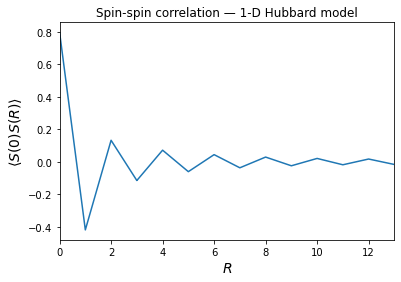

In [7]:
fig, ax = plt.subplots()
x = np.arange(26)
y = obs['SpinZ_eqR'][0][0][0]
yerr = obs['SpinZ_eqR_err'][0][0][0]
ax.errorbar(x-12,y,yerr)
ax.set_xlim([0,13])
ax.set_title('Spin-spin correlation — 1-D Hubbard model')
ax.set_xlabel(r'$R$', fontsize=14)
ax.set_ylabel(r'$\langle S(0)S(R)\rangle$', fontsize=14);